### Make figures S7 - S14 - Individual detections

# Load necessary libraries

In [1]:
import pickle
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import math
import shapefile
from rasterio.plot import show
from rasterio.merge import merge
from matplotlib.patches import Rectangle
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from rasterio.warp import calculate_default_transform, reproject, Resampling
from scipy import stats
from pyproj import Transformer
from pyproj import Geod
from netCDF4 import Dataset    


In [2]:
figure_folder = '/home/ram21/notebooks/brunt-is2-rifts/figures'

atl06_path = '/data/fast1/arc/atl06/brunt.pkl'

# Halloween Crack observations merged
#HCobs_path = '/home/ram21/notebooks/brunt-is2-rifts/brunt_himedlow_mdt_halloween_merged.pickle'
# Halloween Crack observations unmerged
HCobs_path = '/home/ram21/notebooks/brunt-is2-rifts/brunt_himedlow_mdt_halloween.pickle'

satellite_path = '/home/ram21/notebooks/brunt-is2-rifts/halloween/'

In [3]:
# load atl06
with open(atl06_path, 'rb') as handle:
    atl06_data = pickle.load(handle)
atl06_data = pd.DataFrame(atl06_data)

# load halloween_obs_merged
with open(HCobs_path, 'rb') as handle:
    hc_obs = pickle.load(handle)


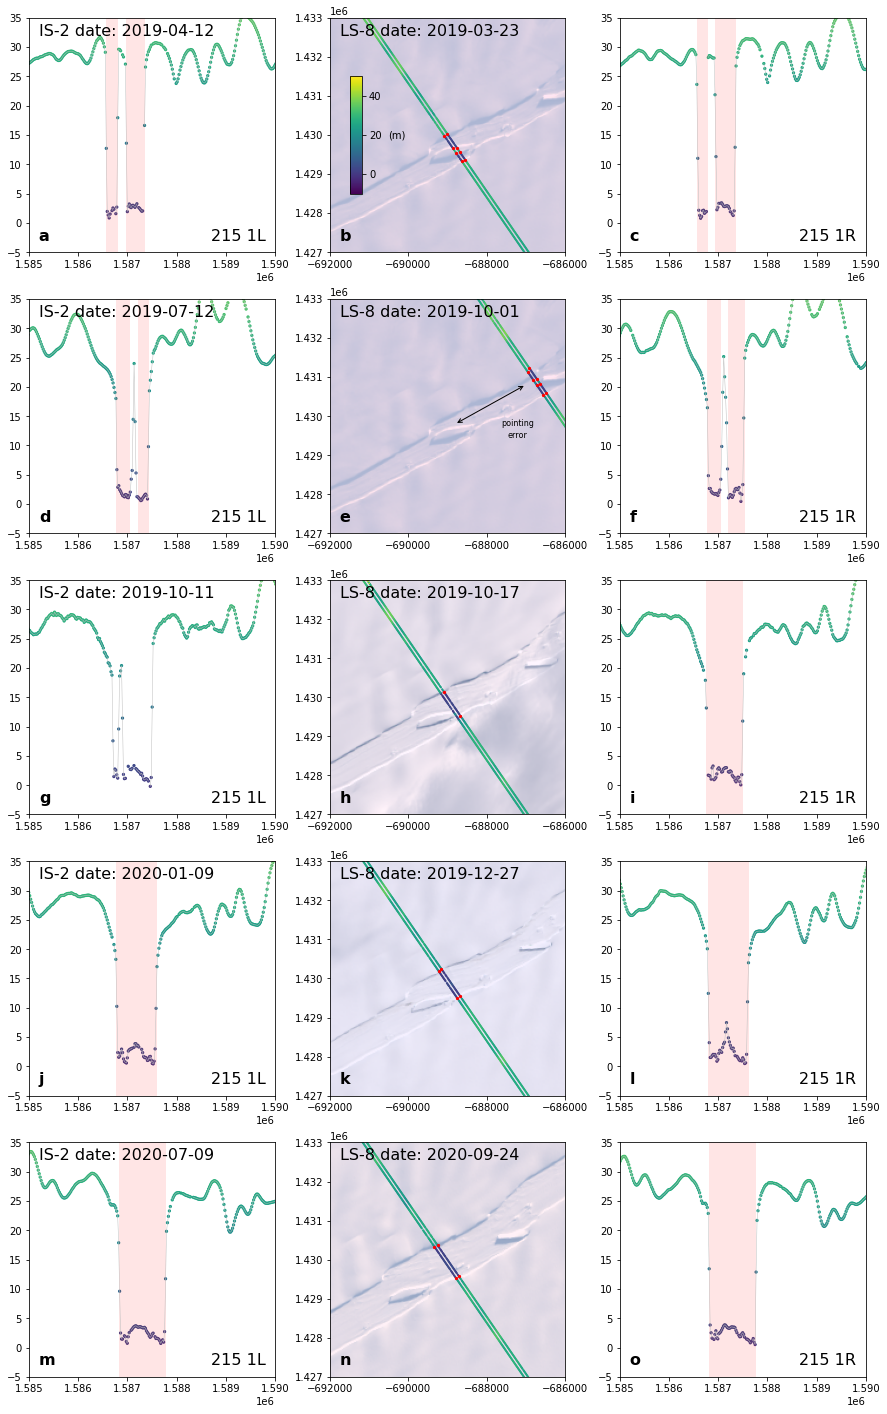

In [4]:
plot_min = -10
plot_max = 50

mdt = -1.1
gr = 0.75

fig=plt.figure(figsize=(15,25))

# 215 1-5

#------------------------------
#2019-04-12
#row 1 L
ax11=fig.add_subplot(5,3,1)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2019-04-12 09:11:15.279099+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax11.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
pl_is = ax11.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2019-04-12 09:11:15.279099+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax11.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
       
#row 1 R
ax13=fig.add_subplot(5,3,3)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2019-04-12 09:11:15.279099+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax13.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax13.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2019-04-12 09:11:15.279099+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax13.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 1 LS8
ax12=fig.add_subplot(5,3,2)
sat = 'LC08_L1GT_182114_20190323_20200829_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax12)
ax12.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax12.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
 
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)
    


#------------------------------
#2019-07-12
#row 2 L
ax21=fig.add_subplot(5,3,4)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2019-07-12 04:50:39.720285+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax21.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax21.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2019-07-12 04:50:39.720285+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax21.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 R
ax23=fig.add_subplot(5,3,6)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2019-07-12 04:50:39.720285+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax23.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax23.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2019-07-12 04:50:39.720285+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax23.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 LS8
ax22=fig.add_subplot(5,3,5)
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax22)
ax22.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax22.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)
    
    

#------------------------------
#2019-10-11
#row 3 L
ax31=fig.add_subplot(5,3,7)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2019-10-11 00:30:46.176107+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax31.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax31.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

#row 3 R
ax33=fig.add_subplot(5,3,9)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2019-10-11 00:30:46.176107+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax33.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax33.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2019-10-11 00:30:46.176107+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax33.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))


#row 3 LS8
ax32=fig.add_subplot(5,3,8)
sat='LC08_L1GT_182114_20191017_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax32)
ax32.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax32.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)

    

#------------------------------
#2020-01-09
#row 4 L
ax41=fig.add_subplot(5,3,10)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2020-01-09 20:10:30.963830+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax41.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax41.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2020-01-09 20:10:30.963830+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax41.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 R
ax43=fig.add_subplot(5,3,12)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2020-01-09 20:10:30.963830+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax43.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax43.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2020-01-09 20:10:30.963830+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"] 
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax43.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 LS8
ax42=fig.add_subplot(5,3,11)
sat='LC08_L1GT_183114_20191227_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax42)
ax42.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax42.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
   
    

#------------------------------
#2020-07-09
#row 5 L 
ax51=fig.add_subplot(5,3,13)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2020-07-09 11:30:03.811160+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax51.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax51.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2020-07-09 11:30:03.811160+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"] 
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax51.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 5 R
ax53=fig.add_subplot(5,3,15)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2020-07-09 11:30:03.811160+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax53.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax53.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2020-07-09 11:30:03.811160+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"] 
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax53.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 5 LS8
ax52=fig.add_subplot(5,3,14)
sat='LC08_L1GT_183114_20200924_20201007_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax52)
ax52.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax52.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax52.scatter(x_start,y_start,c=fcol,s=5)    
    ax52.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax52.scatter(x_start,y_start,c=fcol,s=5)    
    ax52.scatter(x_end,y_end,c=fcol,s=5)


    
#------------------------------
# limits

plot_ymin = -5
plot_ymax = 35
dist_min = 1585000
dist_max = 1590000

map_xmin = -692000
map_xmax = -686000
map_ymin = 1427000
map_ymax = 1433000

ax11.set_ylim(plot_ymin,plot_ymax)
ax11.set_xlim(dist_min,dist_max)
ax13.set_ylim(plot_ymin,plot_ymax)
ax13.set_xlim(dist_min,dist_max)
ax21.set_ylim(plot_ymin,plot_ymax)
ax21.set_xlim(dist_min,dist_max)
ax23.set_ylim(plot_ymin,plot_ymax)
ax23.set_xlim(dist_min,dist_max)
ax31.set_ylim(plot_ymin,plot_ymax)
ax31.set_xlim(dist_min,dist_max)
ax33.set_ylim(plot_ymin,plot_ymax)
ax33.set_xlim(dist_min,dist_max)
ax41.set_ylim(plot_ymin,plot_ymax)
ax41.set_xlim(dist_min,dist_max)
ax43.set_ylim(plot_ymin,plot_ymax)
ax43.set_xlim(dist_min,dist_max)
ax51.set_ylim(plot_ymin,plot_ymax)
ax51.set_xlim(dist_min,dist_max)
ax53.set_ylim(plot_ymin,plot_ymax)
ax53.set_xlim(dist_min,dist_max)

ax12.set_xlim(map_xmin,map_xmax)
ax12.set_ylim(map_ymin,map_ymax)
ax22.set_xlim(map_xmin,map_xmax)
ax22.set_ylim(map_ymin,map_ymax)
ax32.set_xlim(map_xmin,map_xmax)
ax32.set_ylim(map_ymin,map_ymax)
ax42.set_xlim(map_xmin,map_xmax)
ax42.set_ylim(map_ymin,map_ymax)
ax52.set_xlim(map_xmin,map_xmax)
ax52.set_ylim(map_ymin,map_ymax)

ax12.locator_params(axis='x', nbins=4)
ax22.locator_params(axis='x', nbins=4)
ax32.locator_params(axis='x', nbins=4)
ax42.locator_params(axis='x', nbins=4)
ax52.locator_params(axis='x', nbins=4)

ftsz=16
ax11.annotate("IS-2 date: 2019-04-12",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax21.annotate("IS-2 date: 2019-07-12",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax31.annotate("IS-2 date: 2019-10-11",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax41.annotate("IS-2 date: 2020-01-09",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax51.annotate("IS-2 date: 2020-07-09",(dist_min+200,plot_ymax-3),fontsize=ftsz)

ax11.annotate("215 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax13.annotate("215 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax21.annotate("215 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax23.annotate("215 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax31.annotate("215 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax33.annotate("215 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax41.annotate("215 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax43.annotate("215 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax51.annotate("215 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax53.annotate("215 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')

ax11.annotate("a",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax12.annotate("b",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax13.annotate("c",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax21.annotate("d",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax22.annotate("e",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax23.annotate("f",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax31.annotate("g",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax32.annotate("h",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax33.annotate("i",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax41.annotate("j",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax42.annotate("k",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax43.annotate("l",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax51.annotate("m",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax52.annotate("n",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax53.annotate("o",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')

ax12.annotate("LS-8 date: 2019-03-23",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax22.annotate("LS-8 date: 2019-10-01",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax32.annotate("LS-8 date: 2019-10-17",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax42.annotate("LS-8 date: 2019-12-27",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax52.annotate("LS-8 date: 2020-09-24",(map_xmin+240,map_ymax-450),fontsize=ftsz)

ax22.annotate('', xy=(-688800,1429800), xytext=(-687000,1430800), arrowprops=dict(arrowstyle='<->'))
ax22.annotate("pointing",(-687200,1429750),fontsize=8,ha="center")
ax22.annotate("error",(-687200,1429450),fontsize=8,ha="center")

cbaxes = inset_axes(ax12, width="5%", height="50%",loc='center left',borderpad=2)
cbar = plt.colorbar(pl_is,cax=cbaxes)

ax12.annotate("(m)",(-690300,1430000),ha='center',va='center')

output = figure_folder+'/figS07_215p1_detections.png'
plt.savefig(output, dpi=100, bbox_inches='tight')

plt.show()

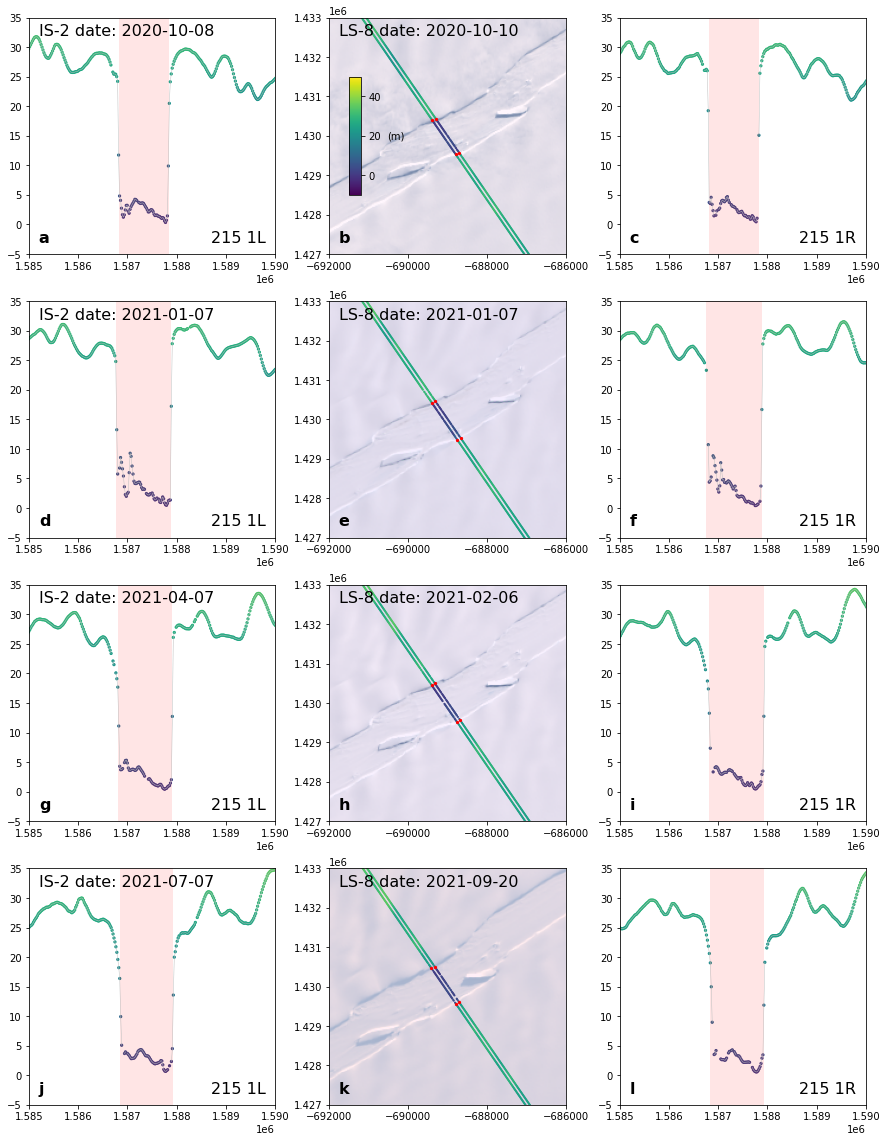

In [5]:
fig=plt.figure(figsize=(15,20))

# 215 6-9

#------------------------------
#2020-10-08
#row 1 L
ax11=fig.add_subplot(4,3,1)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2020-10-08 07:09:51.419930+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax11.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
pl_is=ax11.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2020-10-08 07:09:51.419930+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax11.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
              
#row 1 R
ax13=fig.add_subplot(4,3,3)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2020-10-08 07:09:51.419930+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax13.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax13.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2020-10-08 07:09:51.419930+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax13.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
        
#row 1 LS8
ax12=fig.add_subplot(4,3,2)
sat = 'LC08_L1GT_183114_20201010_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax12)
ax12.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax12.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
 
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)
        

        
#------------------------------
#2021-01-07
#row 2 L
ax21=fig.add_subplot(4,3,4)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2021-01-07 02:49:46.389722+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax21.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax21.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2021-01-07 02:49:46.389722+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax21.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 R
ax23=fig.add_subplot(4,3,6)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2021-01-07 02:49:46.389722+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax23.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax23.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2021-01-07 02:49:46.389722+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax23.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 LS8
ax22=fig.add_subplot(4,3,5)
sat='LC08_L1GT_182114_20210107_20210307_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax22)
ax22.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax22.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)    
    

    
#------------------------------
#2021-04-07
#row 3 L
ax31=fig.add_subplot(4,3,7)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2021-04-07 22:29:38.764368+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax31.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax31.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2021-04-07 22:29:38.764368+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax31.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 R
ax33=fig.add_subplot(4,3,9)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2021-04-07 22:29:38.764368+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax33.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax33.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2021-04-07 22:29:38.764368+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax33.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 LS8
ax32=fig.add_subplot(4,3,8)
sat='LC08_L1GT_184114_20210206_20210302_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax32)
ax32.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax32.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)

for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)   
    
    
    
#------------------------------
#2021-07-07
#row 4 L
ax41=fig.add_subplot(4,3,10)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2021-07-07 18:09:28.025533+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax41.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax41.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2021-07-07 18:09:28.025533+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax41.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 R
ax43=fig.add_subplot(4,3,12)

atl06_plot = atl06_data[(atl06_data["rgt"]==215)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2021-07-07 18:09:28.025533+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax43.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax43.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==215)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2021-07-07 18:09:28.025533+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"] 
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax43.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 LS8
ax42=fig.add_subplot(4,3,11)
sat='LC08_L1GT_182114_20210920_20210924_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax42)
ax42.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax42.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
    


#------------------------------
# limits

plot_ymin = -5
plot_ymax = 35
dist_min = 1585000
dist_max = 1590000

map_xmin = -692000
map_xmax = -686000
map_ymin = 1427000
map_ymax = 1433000

ax11.set_ylim(plot_ymin,plot_ymax)
ax11.set_xlim(dist_min,dist_max)
ax13.set_ylim(plot_ymin,plot_ymax)
ax13.set_xlim(dist_min,dist_max)
ax21.set_ylim(plot_ymin,plot_ymax)
ax21.set_xlim(dist_min,dist_max)
ax23.set_ylim(plot_ymin,plot_ymax)
ax23.set_xlim(dist_min,dist_max)
ax31.set_ylim(plot_ymin,plot_ymax)
ax31.set_xlim(dist_min,dist_max)
ax33.set_ylim(plot_ymin,plot_ymax)
ax33.set_xlim(dist_min,dist_max)
ax41.set_ylim(plot_ymin,plot_ymax)
ax41.set_xlim(dist_min,dist_max)
ax43.set_ylim(plot_ymin,plot_ymax)
ax43.set_xlim(dist_min,dist_max)

ax12.set_xlim(map_xmin,map_xmax)
ax12.set_ylim(map_ymin,map_ymax)
ax22.set_xlim(map_xmin,map_xmax)
ax22.set_ylim(map_ymin,map_ymax)
ax32.set_xlim(map_xmin,map_xmax)
ax32.set_ylim(map_ymin,map_ymax)
ax42.set_xlim(map_xmin,map_xmax)
ax42.set_ylim(map_ymin,map_ymax)

ax12.locator_params(axis='x', nbins=4)
ax22.locator_params(axis='x', nbins=4)
ax32.locator_params(axis='x', nbins=4)
ax42.locator_params(axis='x', nbins=4)

ax11.annotate("IS-2 date: 2020-10-08",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax21.annotate("IS-2 date: 2021-01-07",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax31.annotate("IS-2 date: 2021-04-07",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax41.annotate("IS-2 date: 2021-07-07",(dist_min+200,plot_ymax-3),fontsize=ftsz)

ax11.annotate("215 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax13.annotate("215 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax21.annotate("215 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax23.annotate("215 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax31.annotate("215 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax33.annotate("215 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax41.annotate("215 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax43.annotate("215 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')

ax11.annotate("a",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax12.annotate("b",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax13.annotate("c",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax21.annotate("d",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax22.annotate("e",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax23.annotate("f",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax31.annotate("g",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax32.annotate("h",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax33.annotate("i",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax41.annotate("j",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax42.annotate("k",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax43.annotate("l",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')

ax12.annotate("LS-8 date: 2020-10-10",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax22.annotate("LS-8 date: 2021-01-07",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax32.annotate("LS-8 date: 2021-02-06",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax42.annotate("LS-8 date: 2021-09-20",(map_xmin+240,map_ymax-450),fontsize=ftsz)

cbaxes = inset_axes(ax12, width="5%", height="50%",loc='center left',borderpad=2)
cbar = plt.colorbar(pl_is,cax=cbaxes)

ax12.annotate("(m)",(-690300,1430000),ha='center',va='center')

output = figure_folder+'/figS08_215p2_detections.png'
plt.savefig(output, dpi=100, bbox_inches='tight')

plt.show()

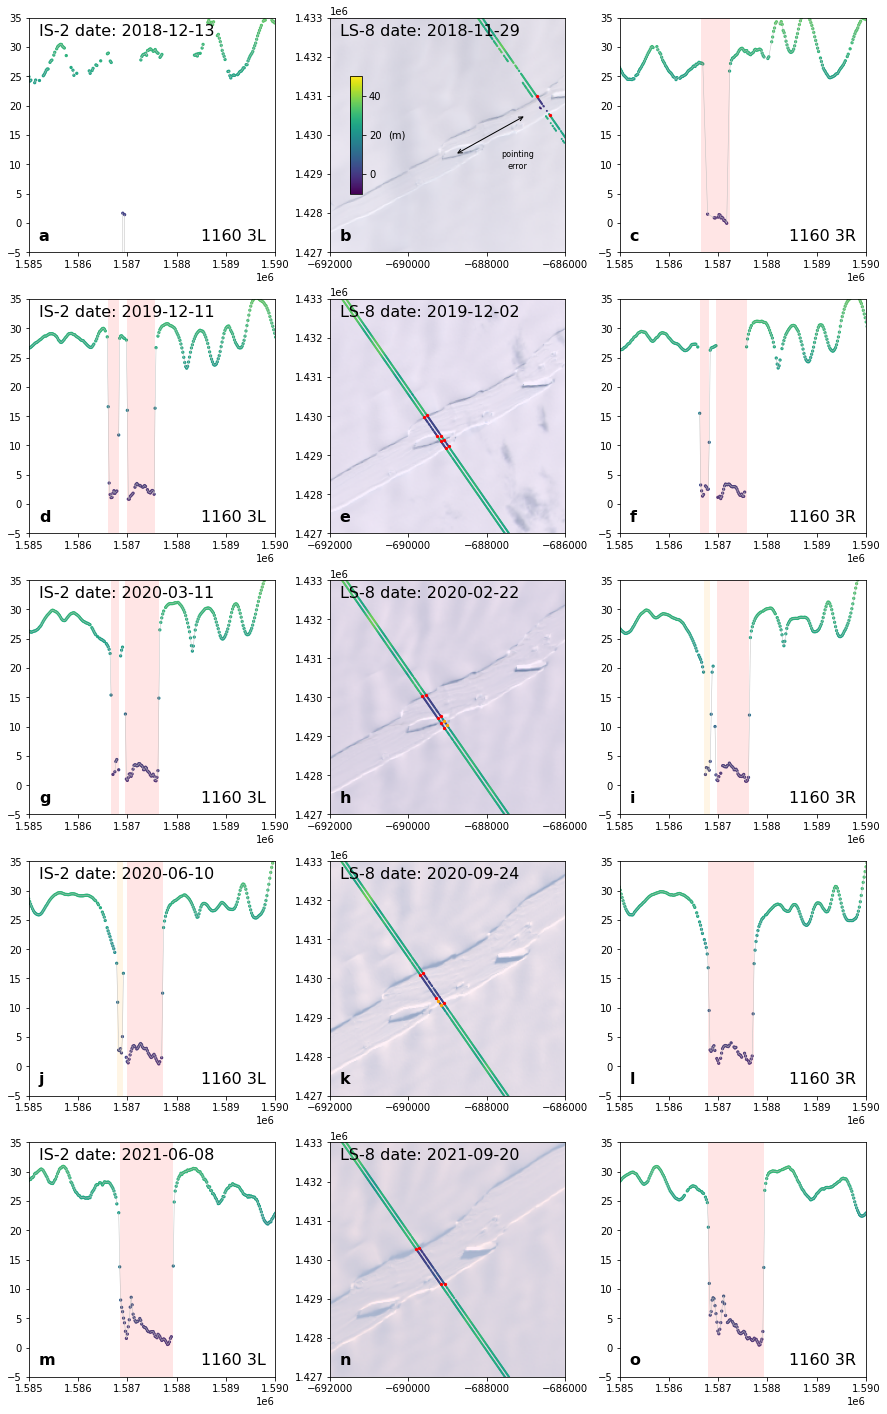

In [6]:
fig=plt.figure(figsize=(15,25))

# 1160 1-5

#------------------------------
#2018-12-13
#row 1 L
ax11=fig.add_subplot(5,3,1)

atl06_plot = atl06_data[(atl06_data["rgt"]==1160)&\
                (atl06_data["beam"]=='3l')&\
                (atl06_data["time"]=="2018-12-13 14:55:15.840583+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_h[(passl_h>50)] = np.nan
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax11.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
pl_is=ax11.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)
        
#row 1 R
ax13=fig.add_subplot(5,3,3)

atl06_plot = atl06_data[(atl06_data["rgt"]==1160)&\
                (atl06_data["beam"]=='3r')&\
                (atl06_data["time"]=="2018-12-13 14:55:15.840583+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_h[(passr_h>50)] = np.nan
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax13.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax13.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==1160)&\
                (hc_obs["beam"]=='3r')&\
                (hc_obs["time"]=="2018-12-13 14:55:15.840583+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax13.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
    
#row 1 LS8
ax12=fig.add_subplot(5,3,2)
sat = 'LC08_L1GT_184114_20181129_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax12)
ax12.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax12.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)
    

    
#------------------------------
#2019-12-11
#row 2 L
ax21=fig.add_subplot(5,3,4)

atl06_plot = atl06_data[(atl06_data["rgt"]==1160)&\
                (atl06_data["beam"]=='3l')&\
                (atl06_data["time"]=="2019-12-11 21:34:29.979251+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax21.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax21.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==1160)&\
                (hc_obs["beam"]=='3l')&\
                (hc_obs["time"]=="2019-12-11 21:34:29.979251+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax21.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 R
ax23=fig.add_subplot(5,3,6)

atl06_plot = atl06_data[(atl06_data["rgt"]==1160)&\
                (atl06_data["beam"]=='3r')&\
                (atl06_data["time"]=="2019-12-11 21:34:29.979251+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax23.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax23.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==1160)&\
                (hc_obs["beam"]=='3r')&\
                (hc_obs["time"]=="2019-12-11 21:34:29.979251+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax23.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 LS8
ax22=fig.add_subplot(5,3,5)
sat='LC08_L1GT_184114_20191202_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax22)
ax22.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax22.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)
    
    

#------------------------------
#2020-03-11
#row 3 L
ax31=fig.add_subplot(5,3,7)

atl06_plot = atl06_data[(atl06_data["rgt"]==1160)&\
                (atl06_data["beam"]=='3l')&\
                (atl06_data["time"]=="2020-03-11 17:14:18.643117+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax31.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax31.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==1160)&\
                (hc_obs["beam"]=='3l')&\
                (hc_obs["time"]=="2020-03-11 17:14:18.643117+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax31.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 R
ax33=fig.add_subplot(5,3,9)

atl06_plot = atl06_data[(atl06_data["rgt"]==1160)&\
                (atl06_data["beam"]=='3r')&\
                (atl06_data["time"]=="2020-03-11 17:14:18.643117+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax33.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax33.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==1160)&\
                (hc_obs["beam"]=='3r')&\
                (hc_obs["time"]=="2020-03-11 17:14:18.643117+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax33.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))


#row 3 LS8
ax32=fig.add_subplot(5,3,8)
sat='LC08_L1GT_182114_20200222_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax32)
ax32.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax32.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
 
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)
    
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)
   
    
    
#------------------------------
#2020-06-10
#row 4 L
ax41=fig.add_subplot(5,3,10)

atl06_plot = atl06_data[(atl06_data["rgt"]==1160)&\
                (atl06_data["beam"]=='3l')&\
                (atl06_data["time"]=="2020-06-10 12:54:03.148957+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax41.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax41.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==1160)&\
                (hc_obs["beam"]=='3l')&\
                (hc_obs["time"]=="2020-06-10 12:54:03.148957+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax41.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 R
ax43=fig.add_subplot(5,3,12)

atl06_plot = atl06_data[(atl06_data["rgt"]==1160)&\
                (atl06_data["beam"]=='3r')&\
                (atl06_data["time"]=="2020-06-10 12:54:03.148957+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax43.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax43.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==1160)&\
                (hc_obs["beam"]=='3r')&\
                (hc_obs["time"]=="2020-06-10 12:54:03.148957+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"] 
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax43.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 LS8
ax42=fig.add_subplot(5,3,11)
sat='LC08_L1GT_183114_20200924_20201007_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax42)
ax42.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax42.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
   
    

#------------------------------
#2021-06-08
#row 5 L 
ax51=fig.add_subplot(5,3,13)

atl06_plot = atl06_data[(atl06_data["rgt"]==1160)&\
                (atl06_data["beam"]=='3l')&\
                (atl06_data["time"]=="2021-06-08 19:33:25.881857+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_h[(passl_h>50)] = np.nan
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax51.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax51.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==1160)&\
                (hc_obs["beam"]=='3l')&\
                (hc_obs["time"]=="2021-06-08 19:33:25.881857+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"] 
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax51.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 5 R
ax53=fig.add_subplot(5,3,15)

atl06_plot = atl06_data[(atl06_data["rgt"]==1160)&\
                (atl06_data["beam"]=='3r')&\
                (atl06_data["time"]=="2021-06-08 19:33:25.881857+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax53.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax53.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==1160)&\
                (hc_obs["beam"]=='3r')&\
                (hc_obs["time"]=="2021-06-08 19:33:25.881857+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"] 
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax53.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 5 LS8
ax52=fig.add_subplot(5,3,14)
sat='LC08_L1GT_182114_20210920_20210924_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax52)
ax52.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax52.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax52.scatter(x_start,y_start,c=fcol,s=5)    
    ax52.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax52.scatter(x_start,y_start,c=fcol,s=5)    
    ax52.scatter(x_end,y_end,c=fcol,s=5)



#------------------------------
# limits

plot_ymin = -5
plot_ymax = 35
dist_min = 1585000
dist_max = 1590000

map_xmin = -692000
map_xmax = -686000
map_ymin = 1427000
map_ymax = 1433000

ax11.set_ylim(plot_ymin,plot_ymax)
ax11.set_xlim(dist_min,dist_max)
ax13.set_ylim(plot_ymin,plot_ymax)
ax13.set_xlim(dist_min,dist_max)
ax21.set_ylim(plot_ymin,plot_ymax)
ax21.set_xlim(dist_min,dist_max)
ax23.set_ylim(plot_ymin,plot_ymax)
ax23.set_xlim(dist_min,dist_max)
ax31.set_ylim(plot_ymin,plot_ymax)
ax31.set_xlim(dist_min,dist_max)
ax33.set_ylim(plot_ymin,plot_ymax)
ax33.set_xlim(dist_min,dist_max)
ax41.set_ylim(plot_ymin,plot_ymax)
ax41.set_xlim(dist_min,dist_max)
ax43.set_ylim(plot_ymin,plot_ymax)
ax43.set_xlim(dist_min,dist_max)
ax51.set_ylim(plot_ymin,plot_ymax)
ax51.set_xlim(dist_min,dist_max)
ax53.set_ylim(plot_ymin,plot_ymax)
ax53.set_xlim(dist_min,dist_max)

ax12.set_xlim(map_xmin,map_xmax)
ax12.set_ylim(map_ymin,map_ymax)
ax22.set_xlim(map_xmin,map_xmax)
ax22.set_ylim(map_ymin,map_ymax)
ax32.set_xlim(map_xmin,map_xmax)
ax32.set_ylim(map_ymin,map_ymax)
ax42.set_xlim(map_xmin,map_xmax)
ax42.set_ylim(map_ymin,map_ymax)
ax52.set_xlim(map_xmin,map_xmax)
ax52.set_ylim(map_ymin,map_ymax)

ax12.locator_params(axis='x', nbins=4)
ax22.locator_params(axis='x', nbins=4)
ax32.locator_params(axis='x', nbins=4)
ax42.locator_params(axis='x', nbins=4)
ax52.locator_params(axis='x', nbins=4)

ftsz=16
ax11.annotate("IS-2 date: 2018-12-13",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax21.annotate("IS-2 date: 2019-12-11",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax31.annotate("IS-2 date: 2020-03-11",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax41.annotate("IS-2 date: 2020-06-10",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax51.annotate("IS-2 date: 2021-06-08",(dist_min+200,plot_ymax-3),fontsize=ftsz)

ax11.annotate("1160 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax13.annotate("1160 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax21.annotate("1160 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax23.annotate("1160 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax31.annotate("1160 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax33.annotate("1160 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax41.annotate("1160 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax43.annotate("1160 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax51.annotate("1160 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax53.annotate("1160 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')

ax11.annotate("a",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax12.annotate("b",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax13.annotate("c",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax21.annotate("d",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax22.annotate("e",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax23.annotate("f",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax31.annotate("g",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax32.annotate("h",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax33.annotate("i",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax41.annotate("j",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax42.annotate("k",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax43.annotate("l",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax51.annotate("m",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax52.annotate("n",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax53.annotate("o",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')

ax12.annotate("LS-8 date: 2018-11-29",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax22.annotate("LS-8 date: 2019-12-02",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax32.annotate("LS-8 date: 2020-02-22",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax42.annotate("LS-8 date: 2020-09-24",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax52.annotate("LS-8 date: 2021-09-20",(map_xmin+240,map_ymax-450),fontsize=ftsz)

ax12.annotate('', xy=(-688800,1429500), xytext=(-687000,1430500), arrowprops=dict(arrowstyle='<->'))
ax12.annotate("pointing",(-687200,1429450),fontsize=8,ha="center")
ax12.annotate("error",(-687200,1429150),fontsize=8,ha="center")

cbaxes = inset_axes(ax12, width="5%", height="50%",loc='center left',borderpad=2)
cbar = plt.colorbar(pl_is,cax=cbaxes)

ax12.annotate("(m)",(-690300,1430000),ha='center',va='center')

output = figure_folder+'/figS09_1160_detections.png'
plt.savefig(output, dpi=100, bbox_inches='tight')

plt.show()

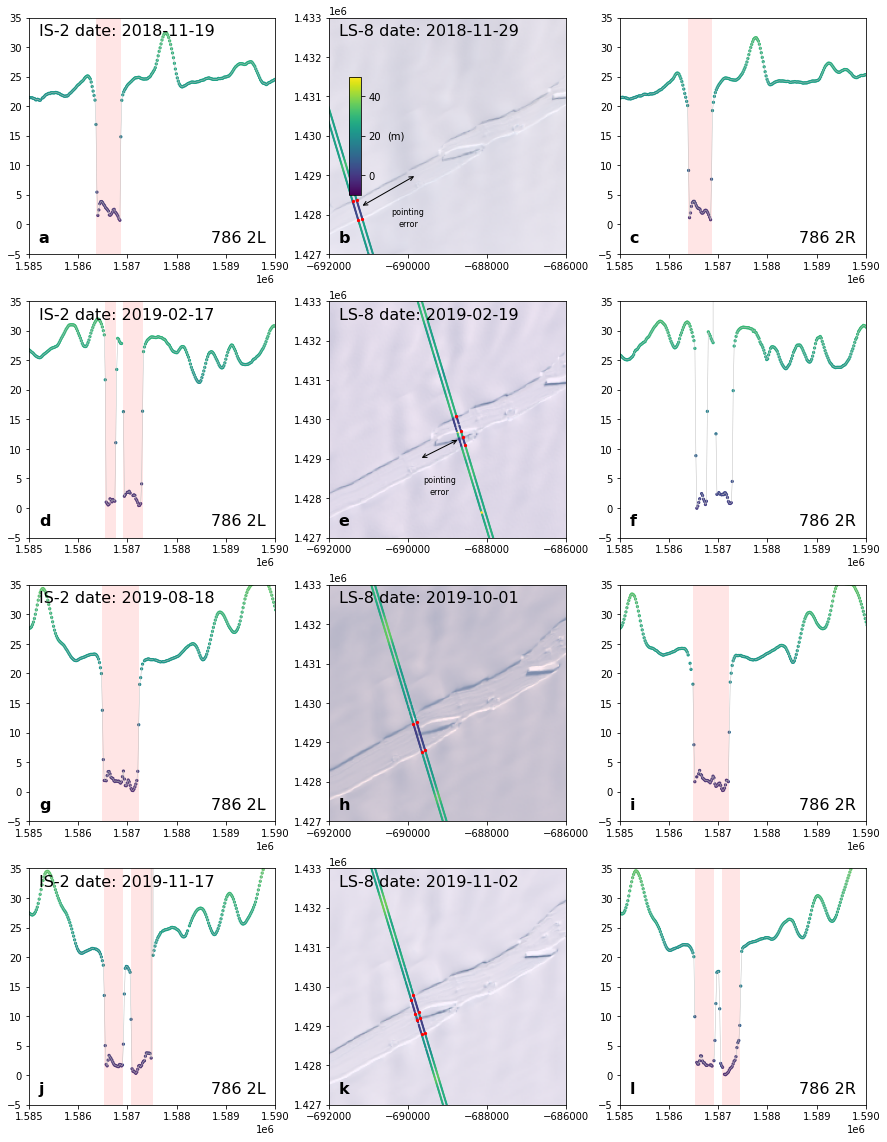

In [7]:
fig=plt.figure(figsize=(15,20))

# 786 1-4

#------------------------------
#2018-12-13
#row 1 L
ax11=fig.add_subplot(4,3,1)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2018-11-19 03:03:53.408036+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_h[(passl_h>50)] = np.nan
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax11.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
pl_is=ax11.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2018-11-19 03:03:53.408036+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for l in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[l]
    d_end = dl_ends.iloc[l]
    d_conf = dl_confs.iloc[l]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax11.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
        
#row 1 R
ax13=fig.add_subplot(4,3,3)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2018-11-19 03:03:53.408036+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_h[(passr_h>50)] = np.nan
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax13.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax13.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2r')&\
                (hc_obs["time"]=="2018-11-19 03:03:53.408036+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax13.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
    
#row 1 LS8
ax12=fig.add_subplot(4,3,2)
sat = 'LC08_L1GT_184114_20181129_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax12)

ax12.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax12.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
   
for l in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[l]
    x_end = xl_ends.iloc[l]
    y_start = yl_starts.iloc[l]
    y_end = yl_ends.iloc[l]
    d_conf = dl_confs.iloc[l]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)    
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)
    

    
#------------------------------
#2019-02-17
#row 2 L
ax21=fig.add_subplot(4,3,4)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2019-02-17 22:43:42.183916+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax21.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax21.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2019-02-17 22:43:42.183916+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax21.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 R
ax23=fig.add_subplot(4,3,6)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2019-02-17 22:43:42.183916+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax23.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax23.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

#row 2 LS8
ax22=fig.add_subplot(4,3,5)
sat='LC08_L1GT_182114_20190219_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax22)
ax22.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax22.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)

    

#------------------------------
#2019-08-18
#row 3 L
ax31=fig.add_subplot(4,3,7)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2019-08-18 14:03:06.913589+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax31.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax31.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2019-08-18 14:03:06.913589+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax31.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 R
ax33=fig.add_subplot(4,3,9)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2019-08-18 14:03:06.913589+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax33.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax33.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2r')&\
                (hc_obs["time"]=="2019-08-18 14:03:06.913589+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax33.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))


#row 3 LS8
ax32=fig.add_subplot(4,3,8)
sat='LC08_L1GT_182114_20191001_20200825_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax32)
ax32.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax32.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
 
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)
    
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)
   
    
    
#------------------------------
#2019-11-17
#row 4 L
ax41=fig.add_subplot(4,3,10)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2019-11-17 09:43:00.697891+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax41.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax41.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2019-11-17 09:43:00.697891+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax41.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 R
ax43=fig.add_subplot(4,3,12)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2019-11-17 09:43:00.697891+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax43.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax43.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2r')&\
                (hc_obs["time"]=="2019-11-17 09:43:00.697891+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"] 
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax43.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 LS8
ax42=fig.add_subplot(4,3,11)
sat='LC08_L1GT_182114_20191102_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax42)
ax42.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax42.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)



#------------------------------
# limits

plot_ymin = -5
plot_ymax = 35
dist_min = 1585000
dist_max = 1590000

map_xmin = -692000
map_xmax = -686000
map_ymin = 1427000
map_ymax = 1433000

ftsz=16
ax11.set_ylim(plot_ymin,plot_ymax)
ax11.set_xlim(dist_min,dist_max)
ax13.set_ylim(plot_ymin,plot_ymax)
ax13.set_xlim(dist_min,dist_max)
ax21.set_ylim(plot_ymin,plot_ymax)
ax21.set_xlim(dist_min,dist_max)
ax23.set_ylim(plot_ymin,plot_ymax)
ax23.set_xlim(dist_min,dist_max)
ax31.set_ylim(plot_ymin,plot_ymax)
ax31.set_xlim(dist_min,dist_max)
ax33.set_ylim(plot_ymin,plot_ymax)
ax33.set_xlim(dist_min,dist_max)
ax41.set_ylim(plot_ymin,plot_ymax)
ax41.set_xlim(dist_min,dist_max)
ax43.set_ylim(plot_ymin,plot_ymax)
ax43.set_xlim(dist_min,dist_max)

ax12.set_xlim(map_xmin,map_xmax)
ax12.set_ylim(map_ymin,map_ymax)
ax22.set_xlim(map_xmin,map_xmax)
ax22.set_ylim(map_ymin,map_ymax)
ax32.set_xlim(map_xmin,map_xmax)
ax32.set_ylim(map_ymin,map_ymax)
ax42.set_xlim(map_xmin,map_xmax)
ax42.set_ylim(map_ymin,map_ymax)

ax12.locator_params(axis='x', nbins=4)
ax22.locator_params(axis='x', nbins=4)
ax32.locator_params(axis='x', nbins=4)
ax42.locator_params(axis='x', nbins=4)

ax11.annotate("IS-2 date: 2018-11-19",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax21.annotate("IS-2 date: 2019-02-17",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax31.annotate("IS-2 date: 2019-08-18",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax41.annotate("IS-2 date: 2019-11-17",(dist_min+200,plot_ymax-3),fontsize=ftsz)

ax11.annotate("786 2L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax13.annotate("786 2R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax21.annotate("786 2L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax23.annotate("786 2R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax31.annotate("786 2L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax33.annotate("786 2R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax41.annotate("786 2L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax43.annotate("786 2R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')

ax11.annotate("a",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax12.annotate("b",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax13.annotate("c",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax21.annotate("d",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax22.annotate("e",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax23.annotate("f",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax31.annotate("g",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax32.annotate("h",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax33.annotate("i",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax41.annotate("j",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax42.annotate("k",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax43.annotate("l",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')

ax12.annotate("LS-8 date: 2018-11-29",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax22.annotate("LS-8 date: 2019-02-19",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax32.annotate("LS-8 date: 2019-10-01",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax42.annotate("LS-8 date: 2019-11-02",(map_xmin+240,map_ymax-450),fontsize=ftsz)

ax12.annotate('', xy=(-691200,1428200), xytext=(-689800,1429000), arrowprops=dict(arrowstyle='<->'))
ax12.annotate("pointing",(-690000,1428000),fontsize=8,ha="center")
ax12.annotate("error",(-690000,1427700),fontsize=8,ha="center")

ax22.annotate('', xy=(-688700,1429500), xytext=(-689700,1429000), arrowprops=dict(arrowstyle='<->'))
ax22.annotate("pointing",(-689200,1428400),fontsize=8,ha="center")
ax22.annotate("error",(-689200,1428100),fontsize=8,ha="center")

cbaxes = inset_axes(ax12, width="5%", height="50%",loc='center left',borderpad=2)
cbar = plt.colorbar(pl_is,cax=cbaxes)

ax12.annotate("(m)",(-690300,1430000),ha='center',va='center')

output = figure_folder+'/figS10_786p1_detections.png'
plt.savefig(output, dpi=100, bbox_inches='tight')

plt.show()

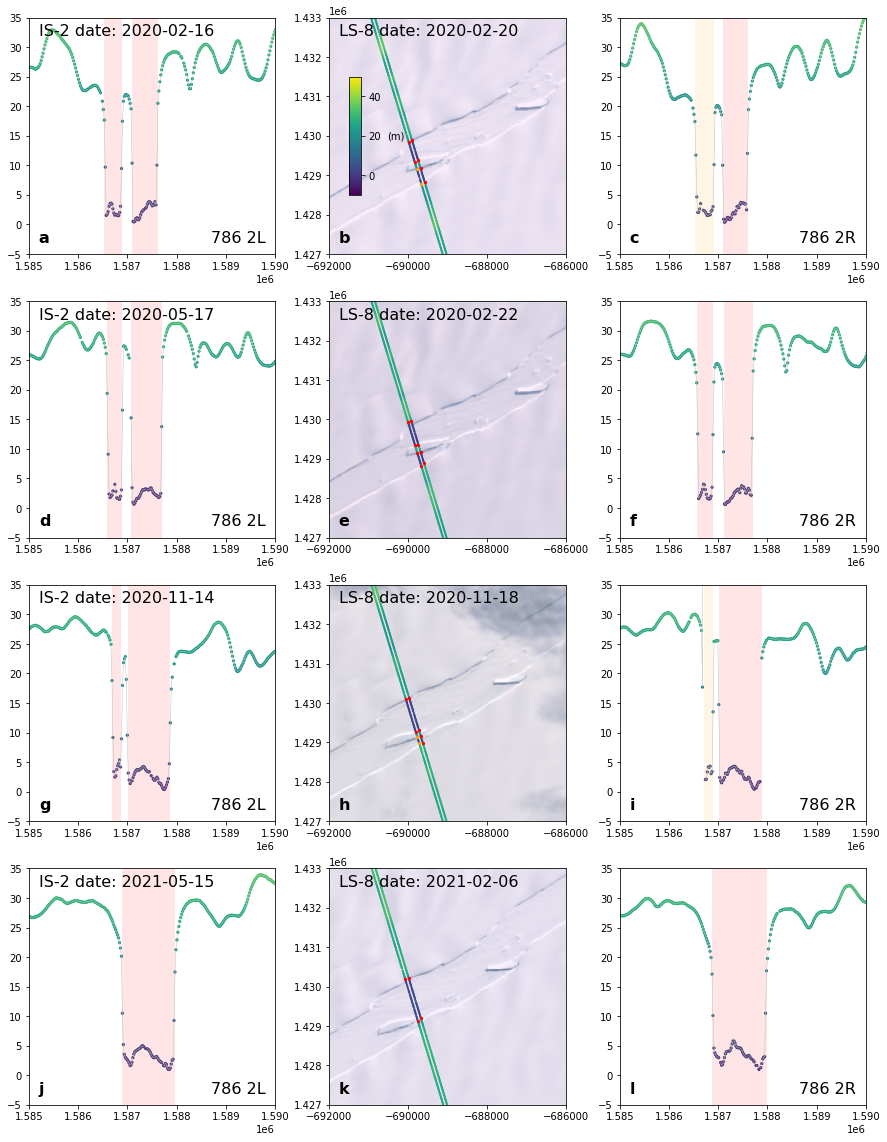

In [8]:
fig=plt.figure(figsize=(15,20))

# 786 5-8

#------------------------------
#2020-02-16
#row 1 L
ax11=fig.add_subplot(4,3,1)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2020-02-16 05:22:43.234264+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_h[(passl_h>50)] = np.nan
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax11.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
pl_is=ax11.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2020-02-16 05:22:43.234264+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for l in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[l]
    d_end = dl_ends.iloc[l]
    d_conf = dl_confs.iloc[l]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax11.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
       
#row 1 R
ax13=fig.add_subplot(4,3,3)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2020-02-16 05:22:43.234264+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_h[(passr_h>50)] = np.nan
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax13.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax13.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2r')&\
                (hc_obs["time"]=="2020-02-16 05:22:43.234264+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax13.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
        
#row 1 LS8
ax12=fig.add_subplot(4,3,2)
sat = 'LC08_L1GT_184114_20200220_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax12)
ax12.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax12.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
   
for l in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[l]
    x_end = xl_ends.iloc[l]
    y_start = yl_starts.iloc[l]
    y_end = yl_ends.iloc[l]
    d_conf = dl_confs.iloc[l]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)    
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)
    


#------------------------------
#2020-05-17
#row 2 L
ax21=fig.add_subplot(4,3,4)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2020-05-17 01:02:33.617834+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax21.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax21.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2020-05-17 01:02:33.617834+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax21.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 R
ax23=fig.add_subplot(4,3,6)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2020-05-17 01:02:33.617834+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax23.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax23.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2r')&\
                (hc_obs["time"]=="2020-05-17 01:02:33.617834+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax23.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 LS8
ax22=fig.add_subplot(4,3,5)
sat='LC08_L1GT_182114_20200222_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax22)
ax22.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax22.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)
        
    

#------------------------------
#2019-11-14
#row 3 L
ax31=fig.add_subplot(4,3,7)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2020-11-14 16:22:07.346965+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax31.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax31.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2020-11-14 16:22:07.346965+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax31.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 R
ax33=fig.add_subplot(4,3,9)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2020-11-14 16:22:07.346965+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax33.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax33.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2r')&\
                (hc_obs["time"]=="2020-11-14 16:22:07.346965+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax33.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 LS8
ax32=fig.add_subplot(4,3,8)
sat='LC08_L1GT_184114_20201118_20210315_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax32)
ax32.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax32.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
 
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)
    
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)
   
    
    
#------------------------------
#2021-05-15
#row 4 L
ax41=fig.add_subplot(4,3,10)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2021-05-15 07:41:56.676391+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax41.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax41.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2021-05-15 07:41:56.676391+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax41.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 R
ax43=fig.add_subplot(4,3,12)

atl06_plot = atl06_data[(atl06_data["rgt"]==786)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2021-05-15 07:41:56.676391+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax43.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax43.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==786)&\
                (hc_obs["beam"]=='2r')&\
                (hc_obs["time"]=="2021-05-15 07:41:56.676391+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"] 
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax43.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 LS8
ax42=fig.add_subplot(4,3,11)
sat='LC08_L1GT_184114_20210206_20210302_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax42)
ax42.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax42.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)


    
#------------------------------
# limits

plot_ymin = -5
plot_ymax = 35
dist_min = 1585000
dist_max = 1590000

map_xmin = -692000
map_xmax = -686000
map_ymin = 1427000
map_ymax = 1433000

ax11.set_ylim(plot_ymin,plot_ymax)
ax11.set_xlim(dist_min,dist_max)
ax13.set_ylim(plot_ymin,plot_ymax)
ax13.set_xlim(dist_min,dist_max)
ax21.set_ylim(plot_ymin,plot_ymax)
ax21.set_xlim(dist_min,dist_max)
ax23.set_ylim(plot_ymin,plot_ymax)
ax23.set_xlim(dist_min,dist_max)
ax31.set_ylim(plot_ymin,plot_ymax)
ax31.set_xlim(dist_min,dist_max)
ax33.set_ylim(plot_ymin,plot_ymax)
ax33.set_xlim(dist_min,dist_max)
ax41.set_ylim(plot_ymin,plot_ymax)
ax41.set_xlim(dist_min,dist_max)
ax43.set_ylim(plot_ymin,plot_ymax)
ax43.set_xlim(dist_min,dist_max)

ax12.set_xlim(map_xmin,map_xmax)
ax12.set_ylim(map_ymin,map_ymax)
ax22.set_xlim(map_xmin,map_xmax)
ax22.set_ylim(map_ymin,map_ymax)
ax32.set_xlim(map_xmin,map_xmax)
ax32.set_ylim(map_ymin,map_ymax)
ax42.set_xlim(map_xmin,map_xmax)
ax42.set_ylim(map_ymin,map_ymax)

ax12.locator_params(axis='x', nbins=4)
ax22.locator_params(axis='x', nbins=4)
ax32.locator_params(axis='x', nbins=4)
ax42.locator_params(axis='x', nbins=4)

ftsz=16
ax11.annotate("IS-2 date: 2020-02-16",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax21.annotate("IS-2 date: 2020-05-17",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax31.annotate("IS-2 date: 2020-11-14",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax41.annotate("IS-2 date: 2021-05-15",(dist_min+200,plot_ymax-3),fontsize=ftsz)

ax11.annotate("786 2L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax13.annotate("786 2R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax21.annotate("786 2L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax23.annotate("786 2R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax31.annotate("786 2L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax33.annotate("786 2R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax41.annotate("786 2L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax43.annotate("786 2R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')

ax11.annotate("a",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax12.annotate("b",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax13.annotate("c",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax21.annotate("d",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax22.annotate("e",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax23.annotate("f",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax31.annotate("g",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax32.annotate("h",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax33.annotate("i",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax41.annotate("j",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax42.annotate("k",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax43.annotate("l",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')

ax12.annotate("LS-8 date: 2020-02-20",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax22.annotate("LS-8 date: 2020-02-22",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax32.annotate("LS-8 date: 2020-11-18",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax42.annotate("LS-8 date: 2021-02-06",(map_xmin+240,map_ymax-450),fontsize=ftsz)

cbaxes = inset_axes(ax12, width="5%", height="50%",loc='center left',borderpad=2)
cbar = plt.colorbar(pl_is,cax=cbaxes)

ax12.annotate("(m)",(-690300,1430000),ha='center',va='center')

output = figure_folder+'/figS11_786p2_detections.png'
plt.savefig(output, dpi=100, bbox_inches='tight')

plt.show()

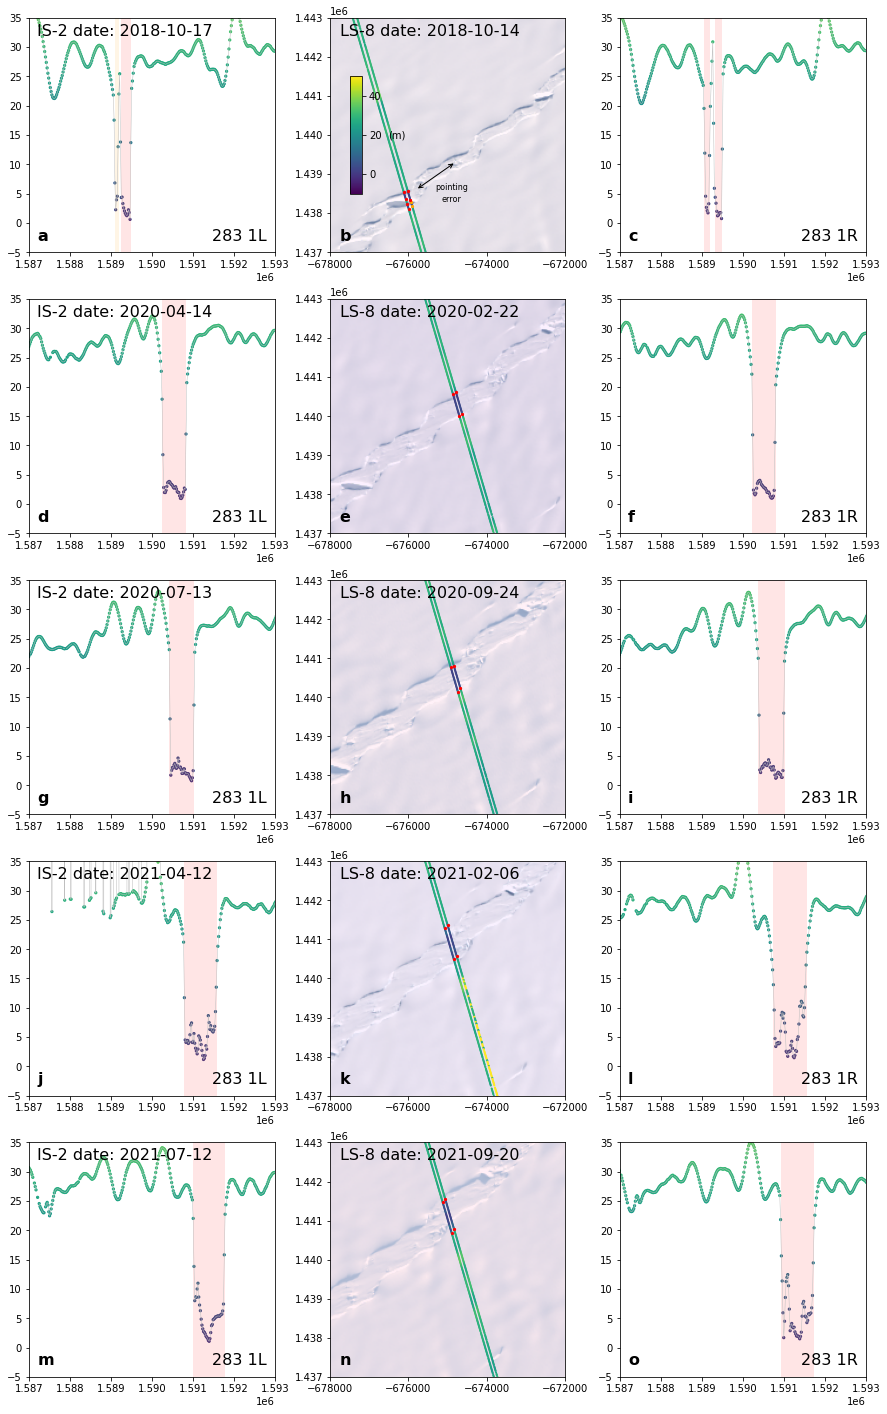

In [9]:
fig=plt.figure(figsize=(15,25))

# 283

#------------------------------
#2018-10-17
#row 1 L
ax11=fig.add_subplot(5,3,1)

atl06_plot = atl06_data[(atl06_data["rgt"]==283)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2018-10-17 04:36:21.159767+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax11.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax11.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==283)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2018-10-17 04:36:21.159767+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax11.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
        
#row 1 R
ax13=fig.add_subplot(5,3,3)

atl06_plot = atl06_data[(atl06_data["rgt"]==283)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2018-10-17 04:36:21.159767+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax13.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax13.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==283)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2018-10-17 04:36:21.159767+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax13.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
    
#row 1 LS8
ax12=fig.add_subplot(5,3,2)
sat = 'LC08_L1GT_182114_20181014_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax12)
ax12.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax12.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
 
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)

    

#------------------------------
#2020-04-14
#row 2 L
ax21=fig.add_subplot(5,3,4)

atl06_plot = atl06_data[(atl06_data["rgt"]==283)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2020-04-14 02:34:48.619858+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax21.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax21.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==283)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2020-04-14 02:34:48.619858+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax21.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 R
ax23=fig.add_subplot(5,3,6)

atl06_plot = atl06_data[(atl06_data["rgt"]==283)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2020-04-14 02:34:48.619858+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax23.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax23.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==283)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2020-04-14 02:34:48.619858+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax23.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 LS8
ax22=fig.add_subplot(5,3,5)
sat='LC08_L1GT_182114_20200222_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax22)
ax22.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax22.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)
    
    

#------------------------------
#2020-07-13
#row 3 L
ax31=fig.add_subplot(5,3,7)

atl06_plot = atl06_data[(atl06_data["rgt"]==283)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2020-07-13 22:14:35.966560+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax31.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax31.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==283)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2020-07-13 22:14:35.966560+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for l in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[l]
    d_end = dl_ends.iloc[l]
    d_conf = dl_confs.iloc[l]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax31.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 R
ax33=fig.add_subplot(5,3,9)

atl06_plot = atl06_data[(atl06_data["rgt"]==283)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2020-07-13 22:14:35.966560+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax33.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax33.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==283)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2020-07-13 22:14:35.966560+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax33.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 LS8
ax32=fig.add_subplot(5,3,8)
sat='LC08_L1GT_183114_20200924_20201007_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax32)
ax32.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax32.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)   
    
    
    
#------------------------------
#2021-04-12
#row 4 L
ax41=fig.add_subplot(5,3,10)

atl06_plot = atl06_data[(atl06_data["rgt"]==283)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2021-04-12 09:14:08.464718+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax41.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax41.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==283)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2021-04-12 09:14:08.464718+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax41.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 R
ax43=fig.add_subplot(5,3,12)

atl06_plot = atl06_data[(atl06_data["rgt"]==283)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2021-04-12 09:14:08.464718+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax43.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax43.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==283)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2021-04-12 09:14:08.464718+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"] 
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax43.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 LS8
ax42=fig.add_subplot(5,3,11)
sat='LC08_L1GT_184114_20210206_20210302_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax42)
ax42.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax42.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5) 
    
    

#------------------------------
#2021-07-12
#row 5 L 
ax51=fig.add_subplot(5,3,13)

atl06_plot = atl06_data[(atl06_data["rgt"]==283)&\
                (atl06_data["beam"]=='1l')&\
                (atl06_data["time"]=="2021-07-12 04:53:58.861854+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax51.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax51.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==283)&\
                (hc_obs["beam"]=='1l')&\
                (hc_obs["time"]=="2021-07-12 04:53:58.861854+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"] 
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax51.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 5 R
ax53=fig.add_subplot(5,3,15)

atl06_plot = atl06_data[(atl06_data["rgt"]==283)&\
                (atl06_data["beam"]=='1r')&\
                (atl06_data["time"]=="2021-07-12 04:53:58.861854+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax53.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax53.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==283)&\
                (hc_obs["beam"]=='1r')&\
                (hc_obs["time"]=="2021-07-12 04:53:58.861854+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"] 
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax53.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 5 LS8
ax52=fig.add_subplot(5,3,14)
sat='LC08_L1GT_182114_20210920_20210924_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax52)
ax52.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
pl_is=ax52.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax52.scatter(x_start,y_start,c=fcol,s=5)    
    ax52.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax52.scatter(x_start,y_start,c=fcol,s=5)    
    ax52.scatter(x_end,y_end,c=fcol,s=5)



#------------------------------
# limits

plot_ymin = -5
plot_ymax = 35

dist_min = 1587000
dist_max = 1593000

map_xmin = -678000
map_xmax = -672000
map_ymin = 1437000
map_ymax = 1443000

ax11.set_ylim(plot_ymin,plot_ymax)
ax11.set_xlim(dist_min,dist_max)
ax13.set_ylim(plot_ymin,plot_ymax)
ax13.set_xlim(dist_min,dist_max)
ax21.set_ylim(plot_ymin,plot_ymax)
ax21.set_xlim(dist_min,dist_max)
ax23.set_ylim(plot_ymin,plot_ymax)
ax23.set_xlim(dist_min,dist_max)
ax31.set_ylim(plot_ymin,plot_ymax)
ax31.set_xlim(dist_min,dist_max)
ax33.set_ylim(plot_ymin,plot_ymax)
ax33.set_xlim(dist_min,dist_max)
ax41.set_ylim(plot_ymin,plot_ymax)
ax41.set_xlim(dist_min,dist_max)
ax43.set_ylim(plot_ymin,plot_ymax)
ax43.set_xlim(dist_min,dist_max)
ax51.set_ylim(plot_ymin,plot_ymax)
ax51.set_xlim(dist_min,dist_max)
ax53.set_ylim(plot_ymin,plot_ymax)
ax53.set_xlim(dist_min,dist_max)

ax12.set_xlim(map_xmin,map_xmax)
ax12.set_ylim(map_ymin,map_ymax)
ax22.set_xlim(map_xmin,map_xmax)
ax22.set_ylim(map_ymin,map_ymax)
ax32.set_xlim(map_xmin,map_xmax)
ax32.set_ylim(map_ymin,map_ymax)
ax42.set_xlim(map_xmin,map_xmax)
ax42.set_ylim(map_ymin,map_ymax)
ax52.set_xlim(map_xmin,map_xmax)
ax52.set_ylim(map_ymin,map_ymax)

ax12.locator_params(axis='x', nbins=4)
ax22.locator_params(axis='x', nbins=4)
ax32.locator_params(axis='x', nbins=4)
ax42.locator_params(axis='x', nbins=4)
ax52.locator_params(axis='x', nbins=4)

ftsz=16
ax11.annotate("IS-2 date: 2018-10-17",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax21.annotate("IS-2 date: 2020-04-14",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax31.annotate("IS-2 date: 2020-07-13",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax41.annotate("IS-2 date: 2021-04-12",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax51.annotate("IS-2 date: 2021-07-12",(dist_min+200,plot_ymax-3),fontsize=ftsz)

ax11.annotate("283 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax13.annotate("283 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax21.annotate("283 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax23.annotate("283 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax31.annotate("283 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax33.annotate("283 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax41.annotate("283 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax43.annotate("283 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax51.annotate("283 1L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax53.annotate("283 1R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')

ax11.annotate("a",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax12.annotate("b",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax13.annotate("c",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax21.annotate("d",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax22.annotate("e",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax23.annotate("f",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax31.annotate("g",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax32.annotate("h",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax33.annotate("i",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax41.annotate("j",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax42.annotate("k",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax43.annotate("l",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax51.annotate("m",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax52.annotate("n",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax53.annotate("o",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')

ax12.annotate("LS-8 date: 2018-10-14",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax22.annotate("LS-8 date: 2020-02-22",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax32.annotate("LS-8 date: 2020-09-24",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax42.annotate("LS-8 date: 2021-02-06",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax52.annotate("LS-8 date: 2021-09-20",(map_xmin+240,map_ymax-450),fontsize=ftsz)

ax12.annotate('', xy=(-675800,1438600), xytext=(-674800,1439300), arrowprops=dict(arrowstyle='<->'))
ax12.annotate("pointing",(-674900,1438600),fontsize=8,ha="center")
ax12.annotate("error",(-674900,1438300),fontsize=8,ha="center")

cbaxes = inset_axes(ax12, width="5%", height="50%",loc='center left',borderpad=2)
cbar = plt.colorbar(pl_is,cax=cbaxes)

ax12.annotate("(m)",(-676300,1440000),ha='center',va='center')

output = figure_folder+'/figS12_283_detections.png'
plt.savefig(output, dpi=100, bbox_inches='tight')

plt.show()

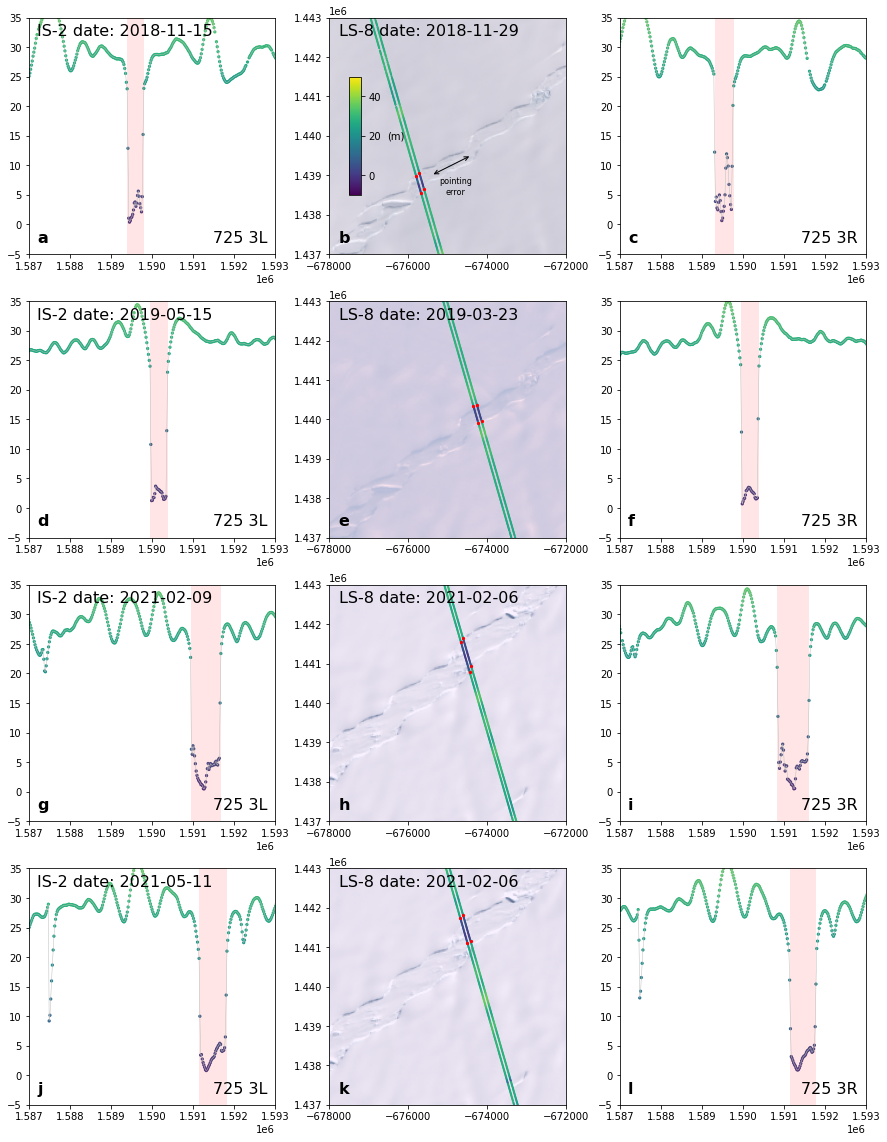

In [10]:
fig=plt.figure(figsize=(15,20))

# 725 1-4

#------------------------------
#2018-11-15
#row 1 L
ax11=fig.add_subplot(4,3,1)

atl06_plot = atl06_data[(atl06_data["rgt"]==725)&\
                (atl06_data["beam"]=='3l')&\
                (atl06_data["time"]=="2018-11-15 03:12:21.336990+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax11.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax11.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==725)&\
                (hc_obs["beam"]=='3l')&\
                (hc_obs["time"]=="2018-11-15 03:12:21.336990+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax11.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
               
#row 1 R
ax13=fig.add_subplot(4,3,3)

atl06_plot = atl06_data[(atl06_data["rgt"]==725)&\
                (atl06_data["beam"]=='3r')&\
                (atl06_data["time"]=="2018-11-15 03:12:21.336990+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax13.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax13.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==725)&\
                (hc_obs["beam"]=='3r')&\
                (hc_obs["time"]=="2018-11-15 03:12:21.336990+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax13.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
         
#row 1 LS8
ax12=fig.add_subplot(4,3,2)
sat = 'LC08_L1GT_184114_20181129_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax12)

ax12.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax12.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
 
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)

    
    
#------------------------------
#2019-05-15
#row 2 L
ax21=fig.add_subplot(4,3,4)

atl06_plot = atl06_data[(atl06_data["rgt"]==725)&\
                (atl06_data["beam"]=='3l')&\
                (atl06_data["time"]=="2019-05-15 18:31:41.937870+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax21.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax21.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==725)&\
                (hc_obs["beam"]=='3l')&\
                (hc_obs["time"]=="2019-05-15 18:31:41.937870+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax21.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 R
ax23=fig.add_subplot(4,3,6)

atl06_plot = atl06_data[(atl06_data["rgt"]==725)&\
                (atl06_data["beam"]=='3r')&\
                (atl06_data["time"]=="2019-05-15 18:31:41.937870+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax23.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax23.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==725)&\
                (hc_obs["beam"]=='3r')&\
                (hc_obs["time"]=="2019-05-15 18:31:41.937870+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax23.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 LS8
ax22=fig.add_subplot(4,3,5)
sat='LC08_L1GT_182114_20190323_20200829_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax22)
ax22.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax22.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)    

    
    
#------------------------------
#2021-02-09
#row 3 L
ax31=fig.add_subplot(4,3,7)

atl06_plot = atl06_data[(atl06_data["rgt"]==725)&\
                (atl06_data["beam"]=='3l')&\
                (atl06_data["time"]=="2021-02-09 12:10:21.604186+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax31.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax31.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==725)&\
                (hc_obs["beam"]=='3l')&\
                (hc_obs["time"]=="2021-02-09 12:10:21.604186+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax31.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 R
ax33=fig.add_subplot(4,3,9)

atl06_plot = atl06_data[(atl06_data["rgt"]==725)&\
                (atl06_data["beam"]=='3r')&\
                (atl06_data["time"]=="2021-02-09 12:10:21.604186+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax33.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax33.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==725)&\
                (hc_obs["beam"]=='3r')&\
                (hc_obs["time"]=="2021-02-09 12:10:21.604186+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax33.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 LS8
ax32=fig.add_subplot(4,3,8)
sat='LC08_L1GT_184114_20210206_20210302_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax32)
ax32.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax32.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)

for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)   
    
    
    
#------------------------------
#2021-05-11
#row 4 L
ax41=fig.add_subplot(4,3,10)

atl06_plot = atl06_data[(atl06_data["rgt"]==725)&\
                (atl06_data["beam"]=='3l')&\
                (atl06_data["time"]=="2021-05-11 07:50:12.607561+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax41.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax41.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==725)&\
                (hc_obs["beam"]=='3l')&\
                (hc_obs["time"]=="2021-05-11 07:50:12.607561+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax41.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 R
ax43=fig.add_subplot(4,3,12)

atl06_plot = atl06_data[(atl06_data["rgt"]==725)&\
                (atl06_data["beam"]=='3r')&\
                (atl06_data["time"]=="2021-05-11 07:50:12.607561+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax43.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax43.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==725)&\
                (hc_obs["beam"]=='3r')&\
                (hc_obs["time"]=="2021-05-11 07:50:12.607561+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"] 
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax43.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 LS8
ax42=fig.add_subplot(4,3,11)
sat='LC08_L1GT_184114_20210206_20210302_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax42)
ax42.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
pl_is=ax42.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
    


#------------------------------
# limits

plot_ymin = -5
plot_ymax = 35

dist_min = 1587000
dist_max = 1593000

map_xmin = -678000
map_xmax = -672000
map_ymin = 1437000
map_ymax = 1443000

ax11.set_ylim(plot_ymin,plot_ymax)
ax11.set_xlim(dist_min,dist_max)
ax13.set_ylim(plot_ymin,plot_ymax)
ax13.set_xlim(dist_min,dist_max)
ax21.set_ylim(plot_ymin,plot_ymax)
ax21.set_xlim(dist_min,dist_max)
ax23.set_ylim(plot_ymin,plot_ymax)
ax23.set_xlim(dist_min,dist_max)
ax31.set_ylim(plot_ymin,plot_ymax)
ax31.set_xlim(dist_min,dist_max)
ax33.set_ylim(plot_ymin,plot_ymax)
ax33.set_xlim(dist_min,dist_max)
ax41.set_ylim(plot_ymin,plot_ymax)
ax41.set_xlim(dist_min,dist_max)
ax43.set_ylim(plot_ymin,plot_ymax)
ax43.set_xlim(dist_min,dist_max)

ax12.set_xlim(map_xmin,map_xmax)
ax12.set_ylim(map_ymin,map_ymax)
ax22.set_xlim(map_xmin,map_xmax)
ax22.set_ylim(map_ymin,map_ymax)
ax32.set_xlim(map_xmin,map_xmax)
ax32.set_ylim(map_ymin,map_ymax)
ax42.set_xlim(map_xmin,map_xmax)
ax42.set_ylim(map_ymin,map_ymax)

ax12.locator_params(axis='x', nbins=4)
ax22.locator_params(axis='x', nbins=4)
ax32.locator_params(axis='x', nbins=4)
ax42.locator_params(axis='x', nbins=4)

#ftsz=16
ax11.annotate("IS-2 date: 2018-11-15",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax21.annotate("IS-2 date: 2019-05-15",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax31.annotate("IS-2 date: 2021-02-09",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax41.annotate("IS-2 date: 2021-05-11",(dist_min+200,plot_ymax-3),fontsize=ftsz)

ax11.annotate("725 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax13.annotate("725 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax21.annotate("725 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax23.annotate("725 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax31.annotate("725 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax33.annotate("725 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax41.annotate("725 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax43.annotate("725 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')

ax11.annotate("a",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax12.annotate("b",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax13.annotate("c",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax21.annotate("d",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax22.annotate("e",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax23.annotate("f",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax31.annotate("g",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax32.annotate("h",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax33.annotate("i",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax41.annotate("j",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax42.annotate("k",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax43.annotate("l",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')

ax12.annotate("LS-8 date: 2018-11-29",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax22.annotate("LS-8 date: 2019-03-23",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax32.annotate("LS-8 date: 2021-02-06",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax42.annotate("LS-8 date: 2021-02-06",(map_xmin+240,map_ymax-450),fontsize=ftsz)

cbaxes = inset_axes(ax12, width="5%", height="50%",loc='center left',borderpad=2)
cbar = plt.colorbar(pl_is,cax=cbaxes)

ax12.annotate('', xy=(-675400,1439000), xytext=(-674400,1439500), arrowprops=dict(arrowstyle='<->'))
ax12.annotate("pointing",(-674800,1438800),fontsize=8,ha="center")
ax12.annotate("error",(-674800,1438500),fontsize=8,ha="center")

ax12.annotate("(m)",(-676300,1440000),ha='center',va='center')

output = figure_folder+'/figS13_725_detections.png'
plt.savefig(output, dpi=100, bbox_inches='tight')

plt.show()

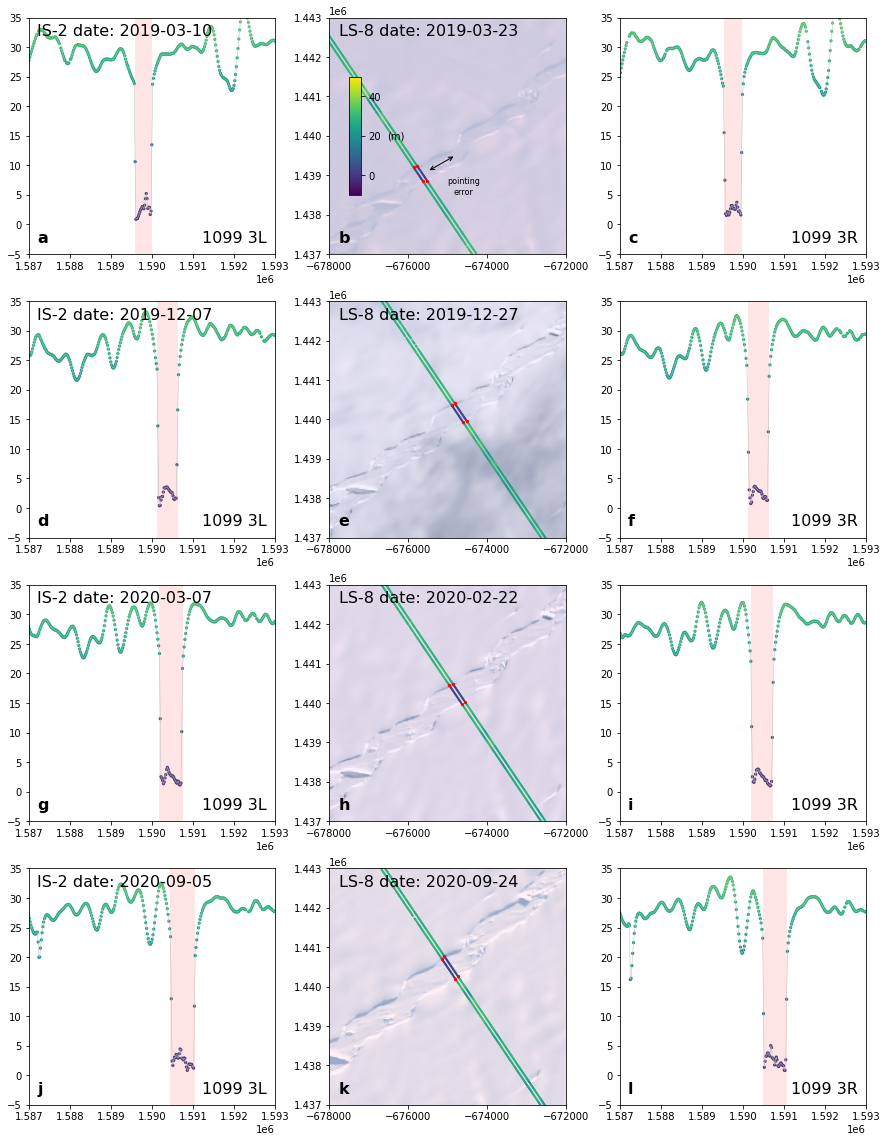

In [11]:
fig=plt.figure(figsize=(15,20))

# 1099 1-4

#------------------------------
#2018-11-15
#row 1 L
ax11=fig.add_subplot(4,3,1)

atl06_plot = atl06_data[(atl06_data["rgt"]==1099)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2019-03-10 10:43:36.388446+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax11.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax11.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==1099)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2019-03-10 10:43:36.388446+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax11.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
               
#row 1 R
ax13=fig.add_subplot(4,3,3)

atl06_plot = atl06_data[(atl06_data["rgt"]==1099)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2019-03-10 10:43:36.388446+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax13.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax13.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==1099)&\
                (hc_obs["beam"]=='2r')&\
                (hc_obs["time"]=="2019-03-10 10:43:36.388446+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax13.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))
         
#row 1 LS8
ax12=fig.add_subplot(4,3,2)
sat = 'LC08_L1GT_182114_20190323_20200829_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax12)

ax12.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax12.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
 
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax12.scatter(x_start,y_start,c=fcol,s=5)    
    ax12.scatter(x_end,y_end,c=fcol,s=5)

    
    
#------------------------------
#2019-05-15
#row 2 L
ax21=fig.add_subplot(4,3,4)

atl06_plot = atl06_data[(atl06_data["rgt"]==1099)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2019-12-07 21:42:50.217233+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax21.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax21.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==1099)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2019-12-07 21:42:50.217233+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax21.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 R
ax23=fig.add_subplot(4,3,6)

atl06_plot = atl06_data[(atl06_data["rgt"]==1099)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2019-12-07 21:42:50.217233+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax23.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax23.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==1099)&\
                (hc_obs["beam"]=='2r')&\
                (hc_obs["time"]=="2019-12-07 21:42:50.217233+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax23.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 2 LS8
ax22=fig.add_subplot(4,3,5)
sat='LC08_L1GT_183114_20191227_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax22)
ax22.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax22.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax22.scatter(x_start,y_start,c=fcol,s=5)    
    ax22.scatter(x_end,y_end,c=fcol,s=5)    

    
    
#------------------------------
#2021-02-09
#row 3 L
ax31=fig.add_subplot(4,3,7)

atl06_plot = atl06_data[(atl06_data["rgt"]==1099)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2020-03-07 17:22:35.306477+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax31.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax31.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==1099)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2020-03-07 17:22:35.306477+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax31.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 R
ax33=fig.add_subplot(4,3,9)

atl06_plot = atl06_data[(atl06_data["rgt"]==1099)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2020-03-07 17:22:35.306477+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax33.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax33.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==1099)&\
                (hc_obs["beam"]=='2r')&\
                (hc_obs["time"]=="2020-03-07 17:22:35.306477+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"]
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax33.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 3 LS8
ax32=fig.add_subplot(4,3,8)
sat='LC08_L1GT_182114_20200222_20201016_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax32)
ax32.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
ax32.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)
    
for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)

for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax32.scatter(x_start,y_start,c=fcol,s=5)    
    ax32.scatter(x_end,y_end,c=fcol,s=5)   
    
    
    
#------------------------------
#2021-05-11
#row 4 L
ax41=fig.add_subplot(4,3,10)

atl06_plot = atl06_data[(atl06_data["rgt"]==1099)&\
                (atl06_data["beam"]=='2l')&\
                (atl06_data["time"]=="2020-09-05 08:42:10.951247+00:00")]

passl_h = atl06_plot["h"].iloc[0]
passl_g = atl06_plot["geoid"].iloc[0]
passl_t = atl06_plot["tides"].iloc[0]
passl_h = passl_h - passl_g - passl_t - mdt
passl_x = atl06_plot["x"].iloc[0]
passl_y = atl06_plot["y"].iloc[0]
passl_d = np.sqrt((passl_x**2) + (passl_y**2))
ax41.plot(passl_d, passl_h, color=(gr,gr,gr), linewidth=0.5)
ax41.scatter(passl_d, passl_h, s=5, c=passl_h, vmin=plot_min, vmax=plot_max)

hcl_plot = hc_obs[(hc_obs["rgt"]==1099)&\
                (hc_obs["beam"]=='2l')&\
                (hc_obs["time"]=="2020-09-05 08:42:10.951247+00:00")]

dl_starts = hcl_plot["d-start"]
dl_ends = hcl_plot["d-end"]
dl_confs = hcl_plot["confidence"]
xl_starts = hcl_plot["x-start"]
xl_ends = hcl_plot["x-end"]
yl_starts = hcl_plot["y-start"]
yl_ends = hcl_plot["y-end"]
for r in range(0,len(hcl_plot)):
    d_start = dl_starts.iloc[r]
    d_end = dl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax41.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 R
ax43=fig.add_subplot(4,3,12)

atl06_plot = atl06_data[(atl06_data["rgt"]==1099)&\
                (atl06_data["beam"]=='2r')&\
                (atl06_data["time"]=="2020-09-05 08:42:10.951247+00:00")]

passr_h = atl06_plot["h"].iloc[0]
passr_g = atl06_plot["geoid"].iloc[0]
passr_t = atl06_plot["tides"].iloc[0]
passr_h = passr_h - passr_g - passr_t - mdt
passr_x = atl06_plot["x"].iloc[0]
passr_y = atl06_plot["y"].iloc[0]
passr_d = np.sqrt((passr_x**2) + (passr_y**2))
ax43.plot(passr_d, passr_h, color=(gr,gr,gr), linewidth=0.5)
ax43.scatter(passr_d, passr_h, s=5, c=passr_h, vmin=plot_min, vmax=plot_max)

hcr_plot = hc_obs[(hc_obs["rgt"]==1099)&\
                (hc_obs["beam"]=='2r')&\
                (hc_obs["time"]=="2020-09-05 08:42:10.951247+00:00")]

dr_starts = hcr_plot["d-start"]
dr_ends = hcr_plot["d-end"]
dr_confs = hcr_plot["confidence"]
xr_starts = hcr_plot["x-start"]
xr_ends = hcr_plot["x-end"]
yr_starts = hcr_plot["y-start"]
yr_ends = hcr_plot["y-end"] 
for r in range(0,len(hcr_plot)):
    d_start = dr_starts.iloc[r]
    d_end = dr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax43.add_patch(Rectangle((d_start,plot_min),d_end-d_start,plot_max-plot_min,\
                            edgecolor = 'none',facecolor = fcol, alpha = 0.1))

#row 4 LS8
ax42=fig.add_subplot(4,3,11)
sat='LC08_L1GT_183114_20200924_20201007_02_T2'
landsat_B4_name = satellite_path+'landsat/'+sat+'/'+sat+'_B4.TIF'
landsat_B3_name = satellite_path+'landsat/'+sat+'/'+sat+'_B3.TIF'
landsat_B2_name = satellite_path+'landsat/'+sat+'/'+sat+'_B2.TIF'
band4 = rasterio.open(landsat_B4_name)
band3 = rasterio.open(landsat_B3_name)
band2 = rasterio.open(landsat_B2_name)

# crop to 99th percentile (stops dull images)
b2 = band2.read(1)
b2[b2 > np.percentile(b2,99)] = np.percentile(b2,99)
b3 = band3.read(1)
b3[b3 > np.percentile(b3,99)] = np.percentile(b3,99)
b4 = band4.read(1)
b4[b4 > np.percentile(b4,99)] = np.percentile(b4,99)

image = np.array([b4, b3, b2]).transpose(1,2,0)
L8_to_plot = (image * (255 / np.max(image))).astype(np.uint8)
   
show(L8_to_plot.transpose(2,0,1), transform=band2.transform,ax=ax42)
ax42.scatter(passl_x, passl_y, c=passl_h, vmin=plot_min, vmax=plot_max, s=1)
pl_is=ax42.scatter(passr_x, passr_y, c=passr_h, vmin=plot_min, vmax=plot_max, s=1)

for r in range(0,len(hcl_plot)):
    x_start = xl_starts.iloc[r]
    x_end = xl_ends.iloc[r]
    y_start = yl_starts.iloc[r]
    y_end = yl_ends.iloc[r]
    d_conf = dl_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
    
for r in range(0,len(hcr_plot)):
    x_start = xr_starts.iloc[r]
    x_end = xr_ends.iloc[r]
    y_start = yr_starts.iloc[r]
    y_end = yr_ends.iloc[r]
    d_conf = dr_confs.iloc[r]
    if d_conf == "high":
        fcol = "red"
    else:
        fcol = "orange"
    ax42.scatter(x_start,y_start,c=fcol,s=5)    
    ax42.scatter(x_end,y_end,c=fcol,s=5)
    


#------------------------------
# limits

plot_ymin = -5
plot_ymax = 35

dist_min = 1587000
dist_max = 1593000

map_xmin = -678000
map_xmax = -672000
map_ymin = 1437000
map_ymax = 1443000

ax11.set_ylim(plot_ymin,plot_ymax)
ax11.set_xlim(dist_min,dist_max)
ax13.set_ylim(plot_ymin,plot_ymax)
ax13.set_xlim(dist_min,dist_max)
ax21.set_ylim(plot_ymin,plot_ymax)
ax21.set_xlim(dist_min,dist_max)
ax23.set_ylim(plot_ymin,plot_ymax)
ax23.set_xlim(dist_min,dist_max)
ax31.set_ylim(plot_ymin,plot_ymax)
ax31.set_xlim(dist_min,dist_max)
ax33.set_ylim(plot_ymin,plot_ymax)
ax33.set_xlim(dist_min,dist_max)
ax41.set_ylim(plot_ymin,plot_ymax)
ax41.set_xlim(dist_min,dist_max)
ax43.set_ylim(plot_ymin,plot_ymax)
ax43.set_xlim(dist_min,dist_max)

ax12.set_xlim(map_xmin,map_xmax)
ax12.set_ylim(map_ymin,map_ymax)
ax22.set_xlim(map_xmin,map_xmax)
ax22.set_ylim(map_ymin,map_ymax)
ax32.set_xlim(map_xmin,map_xmax)
ax32.set_ylim(map_ymin,map_ymax)
ax42.set_xlim(map_xmin,map_xmax)
ax42.set_ylim(map_ymin,map_ymax)

ax12.locator_params(axis='x', nbins=4)
ax22.locator_params(axis='x', nbins=4)
ax32.locator_params(axis='x', nbins=4)
ax42.locator_params(axis='x', nbins=4)

#ftsz=16
ax11.annotate("IS-2 date: 2019-03-10",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax21.annotate("IS-2 date: 2019-12-07",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax31.annotate("IS-2 date: 2020-03-07",(dist_min+200,plot_ymax-3),fontsize=ftsz)
ax41.annotate("IS-2 date: 2020-09-05",(dist_min+200,plot_ymax-3),fontsize=ftsz)

ax11.annotate("1099 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax13.annotate("1099 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax21.annotate("1099 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax23.annotate("1099 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax31.annotate("1099 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax33.annotate("1099 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax41.annotate("1099 3L",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')
ax43.annotate("1099 3R",(dist_max-200,plot_ymin+2),fontsize=ftsz,ha='right')

ax11.annotate("a",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax12.annotate("b",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax13.annotate("c",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax21.annotate("d",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax22.annotate("e",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax23.annotate("f",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax31.annotate("g",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax32.annotate("h",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax33.annotate("i",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax41.annotate("j",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')
ax42.annotate("k",(map_xmin+240,map_ymin+300),fontsize=ftsz,weight='bold')
ax43.annotate("l",(dist_min+200,plot_ymin+2),fontsize=ftsz,weight='bold')

ax12.annotate("LS-8 date: 2019-03-23",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax22.annotate("LS-8 date: 2019-12-27",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax32.annotate("LS-8 date: 2020-02-22",(map_xmin+240,map_ymax-450),fontsize=ftsz)
ax42.annotate("LS-8 date: 2020-09-24",(map_xmin+240,map_ymax-450),fontsize=ftsz)

cbaxes = inset_axes(ax12, width="5%", height="50%",loc='center left',borderpad=2)
cbar = plt.colorbar(pl_is,cax=cbaxes)

ax12.annotate('', xy=(-675500,1439100), xytext=(-674800,1439500), arrowprops=dict(arrowstyle='<->'))
ax12.annotate("pointing",(-674600,1438800),fontsize=8,ha="center")
ax12.annotate("error",(-674600,1438500),fontsize=8,ha="center")

ax12.annotate("(m)",(-676300,1440000),ha='center',va='center')

output = figure_folder+'/figS14_1099_detections.png'
plt.savefig(output, dpi=100, bbox_inches='tight')

plt.show()